  # dap and deredden flux compare

In [1]:
import matplotlib
%matplotlib notebook
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


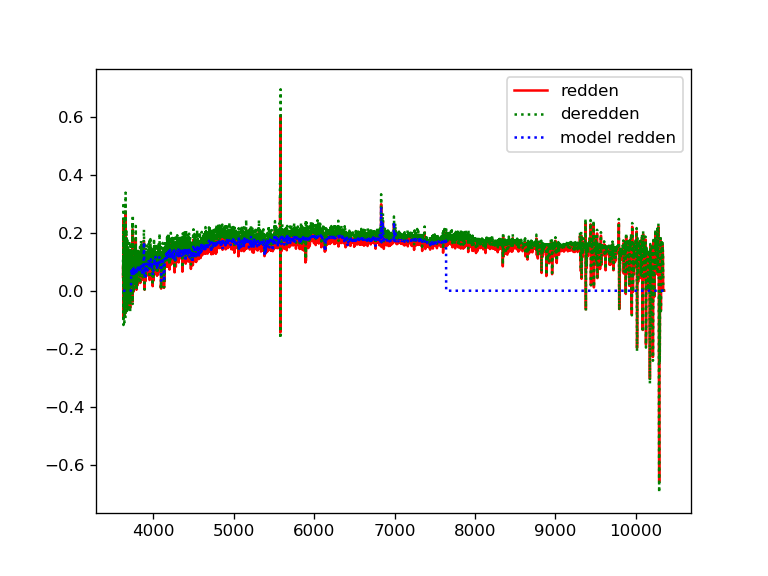

In [2]:



plateifu='10001-12702'
plate=plateifu.split('-')[0]
ifu=plateifu.split('-')[1]
dir_map='/media/ashley/project/mangawork/manga/spectro/analysis/v2_5_3/2.3.0/HYB10-MILESHC-MILESHC/'
file_map=dir_map+'%s/%s/manga-%s-LOGCUBE-HYB10-MILESHC-MILESHC.fits.gz'%(plate,ifu,plateifu)

with fits.open(file_map) as cube:
    wave=cube['WAVE'].data
    flux=np.transpose(cube['FLUX'].data,axes=(1,2,0))
    flux_header=cube['FLUX'].header
    x_center=np.int(flux_header['CRPIX1'])-1
    y_center=np.int(flux_header['CRPIX2'])-1
    model=np.transpose(cube['MODEL'].data,axes=(1,2,0))
    ivar=np.transpose(cube['IVAR'].data,axes=(1,2,0))
    redden=cube['REDCORR'].data
    flux1=flux[x_center,y_center]*redden
    plt.figure()
    plt.plot(wave,flux[x_center,y_center],'r-',label='redden')
    plt.plot(wave,flux1,'g:',label='deredden')
    plt.plot(wave,model[x_center,y_center],'b:',label='model redden')
    plt.legend()
    plt.show()
    


In [3]:
!ls /media/ashley/project/mangawork/manga/spectro/analysis/v2_5_3/2.3.0/HYB10-MILESHC-MILESHC/10001/12701/

manga-10001-12701-LOGCUBE-HYB10-MILESHC-MILESHC.fits.gz
manga-10001-12701-MAPS-HYB10-MILESHC-MILESHC.fits.gz


# model and drp logcube compare

<IPython.core.display.Javascript object>


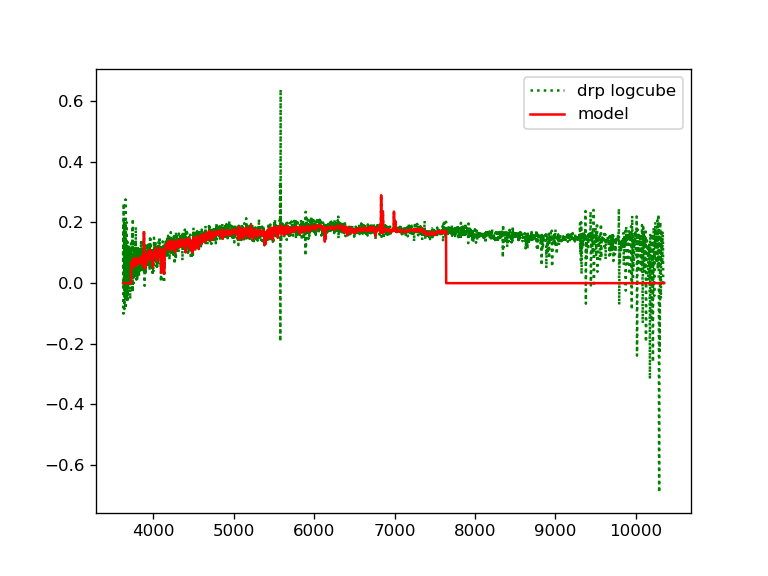

In [4]:
plateifu='10001-12702'
plate=plateifu.split('-')[0]
ifu=plateifu.split('-')[1]
dir_map='/media/ashley/project/mangawork/manga/spectro/analysis/v2_5_3/2.3.0/HYB10-MILESHC-MILESHC/'
file_map=dir_map+'%s/%s/manga-%s-LOGCUBE-HYB10-MILESHC-MILESHC.fits.gz'%(plate,ifu,plateifu)
dir_cube='/media/ashley/project/mangawork/manga/spectro/redux/v2_5_3/'
file_cube=dir_cube+'%s/stack/manga-%s-LOGCUBE.fits.gz'%(plate,plateifu)

with fits.open(file_map) as cube,fits.open(file_cube) as logcube:
    # read model data
    wave=cube['WAVE'].data
    flux=np.transpose(cube['FLUX'].data,axes=(1,2,0))
    flux_header=cube['FLUX'].header
    x_center=np.int(flux_header['CRPIX1'])-1
    y_center=np.int(flux_header['CRPIX2'])-1
    model=np.transpose(cube['MODEL'].data,axes=(1,2,0))
    ivar=np.transpose(cube['IVAR'].data,axes=(1,2,0))
    redden=cube['REDCORR'].data
    flux1=flux[x_center,y_center]*redden
    
    model1=model[x_center,y_center]
    # logcube data
    wave_l=logcube['WAVE'].data
    flux_l=np.transpose(logcube['FLUX'].data,axes=(1,2,0))
    ivar_l=np.transpose(logcube['IVAR'].data,axes=(1,2,0))
    flux_header_l=logcube['FLUX'].header
    flux_l1=flux_l[x_center,y_center]
    
    plt.figure()
    plt.plot(wave_l,flux_l1,'g:',label='drp logcube')
    plt.plot(wave,model1,'r-',label='model')
    
    plt.legend()
    plt.show()

   # ppxf fitting vs model

<IPython.core.display.Javascript object>


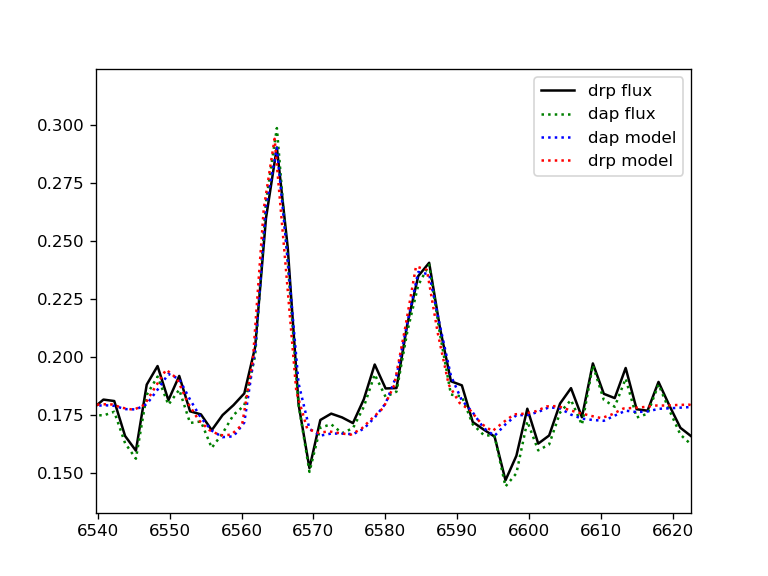

In [6]:
dir_ppxf='/media/ashley/project/pair_galaxy/2020-1-31/bpt/fitting/map_cube_compare/10001-12702_2_5/'
file_ppxf=dir_ppxf+'10001-12702_spectrum.fits'
median_flux_ppxf=0.16577359288930893
dir_stack='/media/ashley/project/pair_galaxy/2020-1-31/bpt/fitting/map_cube_compare/'
file_stack=dir_stack+'10001-12702_gas_rotation.fits'

with fits.open(file_map) as cube,fits.open(file_ppxf) as ppxf,\
    fits.open(file_stack) as stack:
    # read model data
    z=0.0408108
    wave=cube['WAVE'].data/(1+z)
    flux=np.transpose(cube['FLUX'].data,axes=(1,2,0))
    flux_header=cube['FLUX'].header
    x_center=np.int(flux_header['CRPIX1'])-1
    y_center=np.int(flux_header['CRPIX2'])-1
    model=np.transpose(cube['MODEL'].data,axes=(1,2,0))
    ivar=np.transpose(cube['IVAR'].data,axes=(1,2,0))
    redden=cube['REDCORR'].data
    flux1=flux[x_center,y_center]*redden
    
    model1=model[x_center,y_center]
    
    wave_p=ppxf[1].data.field('wave')/(1+z)
    flux_p=ppxf[1].data.field('flux')*median_flux_ppxf
    
    
    wave_s=stack[1].data.field('wave')/(1+z)
    mask=(wave_s>3540) &(wave_s<7409)
    wave_s=wave_s[mask]
    flux_s=stack[1].data.field('flux')[mask]
    
    flux_p=np.roll(flux_p,1)
    plt.figure()
    plt.plot(wave_s,flux_s,'k-',label='drp flux')
    plt.plot(wave,flux[x_center,y_center],'g:',label='dap flux')
    plt.plot(wave,model1,'b:',label='dap model')
    plt.plot(wave_p,flux_p,'r:',label='drp model')
    plt.legend()
    plt.show()